<a href="https://colab.research.google.com/github/EricAshby/EDA-and-Visualization-Assorted-Companies/blob/main/TEDA1040_Mod1_practice_EricAshby_09_14_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Companies Exploratory Data Analysis and Visualization Generation

Eric Ashby

##Introduction


The data explored in this analysis is comprised of information on a number different companies (reported to be 1000 but found to be far fewer than that) and their rankings with respect to one another.  The goal of this analysis is to create visualizations for the data and answer a number of questions.

##Analysis Goals

This analysis aims to create these visualizations and answer their associated questions:
*  Q1:  A count of how many of the companies in the data set are from each state
  *  Q2:  Which state are most of the companies from?
*  Q3:  A sum of how many total job openings there are in each industry
  *  Q4:  Which industry has the most job openings?
*  Q5:  A line chart that shows the average growth rate for each founded year
  *  Q6:  From the years 2000 to 2020, does the growth percentage seem to be increasing, decreasing, or not changing at all?
*  Q7:  A scatter plot that compares the number of employees to estimated revenues for each company
  *  Q8:  What is the relationship between number of employees and estimated revenues?
*  Q9:  A histogram that measures the number of companies founded in each year
  *  Q10:  Does the histogram that results from measuring the year each company was created create a graph that is right skewed, left skewed, or not skewed at all?

This analysis aims to answer the following questions:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("companies.csv")

##Overview

Below are the first two rows of the data set.

In [ ]:
df.head(2)

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
0,OpenAI,openai.com,San Francisco,CA,United States,655,2015.0,AI,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,11000000000.0,1.18
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,NaN,Fintech,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,564000000.0,1.34


This code displays the metadata for the data set.  Notice that there are only 498 entries in this data set that was claimed to have information on 1000 companies.  Clearly, this was inaccurate.

Also worth mentioning are the largley empty columns of 'Accelerator' and 'btype', along with the less empty but still lacking columns of 'keywords', 'LeadInvestors', and 'valuation'.  The columns 'url', 'founded', 'estimated_revenues', and 'job_openings' are also missing data but far less so than those previously mentioned.

The lack of consistency in naming conventions suggests, also, that the data set may be a compilation of multiple sets of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        498 non-null    object 
 1   url                 497 non-null    object 
 2   city                498 non-null    object 
 3   state               498 non-null    object 
 4   country             498 non-null    object 
 5   employees           498 non-null    int64  
 6   founded             399 non-null    float64
 7   Industry            498 non-null    object 
 8   estimated_revenues  497 non-null    float64
 9   job_openings        489 non-null    float64
 10  keywords            223 non-null    object 
 11  LeadInvestors       218 non-null    object 
 12  Accelerator         5 non-null      object 
 13  btype               53 non-null     object 
 14  valuation           231 non-null    float64
 15  total_funding       385 non-null    object 
 16  growth_p

The code, here, displays the descriptive statistics for the numerical data in the data set.

The most stand-out data seems to be the very old company founded in 1915; the skews in the 'estimated_revenues', 'job_openings', 'valuation', and 'growth_percentage' columns; and the extrema in the same.

In [ ]:
df.describe()

,employees,founded,estimated_revenues,job_openings,valuation,growth_percentage
count,498.000000,399.000000,4.970000e+02,489.000000,2.310000e+02,498.000000
mean,284.540161,2013.624060,7.456914e+07,9.543967,2.381256e+09,0.810281
std,212.642887,9.208311,1.496897e+08,33.822018,4.264465e+09,1.003153
min,26.000000,1915.000000,1.957500e+06,1.000000,9.000000e+07,0.000000
25%,127.000000,2013.000000,2.291362e+07,1.000000,1.000000e+09,0.210000
50%,218.500000,2016.000000,3.926975e+07,1.000000,1.250000e+09,0.440000
75%,387.750000,2018.000000,8.534400e+07,6.000000,2.275000e+09,0.920000
max,985.000000,2022.000000,2.010000e+09,660.000000,4.045200e+10,7.510000


The following code quickly checks for standardization errors in the company names. If the two printed numbers are different, there are multiple versions of the same company name in the data set. As the two number turn out to be the same, we can surmise that no such standardization errors exist in the data set.

In [ ]:
print(len(df['company_name'].sort_values().unique()))
print(len(df['company_name'].sort_values().str.title().unique()))

492
492


Below are companies with the same name. Given different states, industries, growth percentages, etc. it may be appropriate to keep some of these as separate companies for certain questions while dropping them for others.

In [ ]:
df[df.duplicated(subset = 'company_name', keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
279,Alma,helloalma.com,New York,NY,United States,624,2018.0,Digital Health,116459000.0,5.0,"Healthcare, Technology, Health and Wellness, M...",NaN,NaN,NaN,NaN,90500000.0,0.90
311,Alma,helloalma.com,New York,NY,United State,558,2018.0,Hospital/Healthcare,272160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94
468,H1,h1insights.com,New York,NY,United States,483,NaN,Tech Services,93364050.0,1.0,NaN,NaN,NaN,NaN,NaN,170900000.0,0.07
470,H1,h1insights.com,New York,NY,United States,514,2017.0,Digital Health,96012000.0,37.0,saas,NaN,NaN,NaN,NaN,170900000.0,0.18
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
129,Optimism,Optimism.io,San Francisco,CA,United States,37,NaN,Tech Services,4408000.0,NaN,NaN,"Paradigm, Huobi Ventures, Andreessen Horowitz",NaN,NaN,1.650000e+09,178500000.0,1.31
146,Optimism,optimism.io,New York,NY,United States,54,2019.0,Tech Services,7190550.0,1.0,NaN,"Andreessen Horowitz, Paradigm",NaN,NaN,1.650000e+09,178500000.0,0.69


##Analysis

###Question 1

Using matplotlib/seaborn, create a countplot that shows a count of how many of the companies in the data set are from each state.

####Using `matplotlib`:

Here, we make a count chart for the number of companies in each state using `matplotlib`.

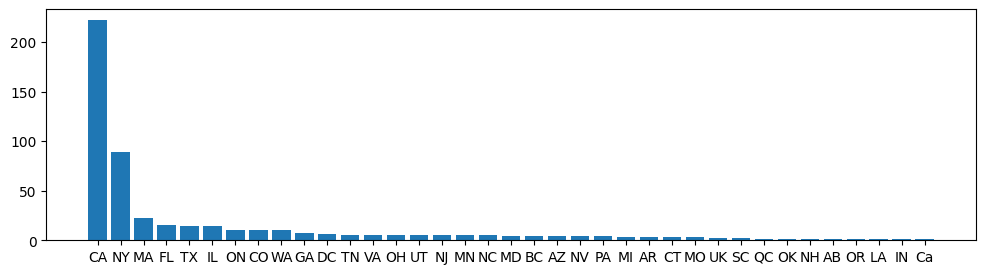

In [ ]:
#create lists containing state count info
states = df['state'].value_counts().index
stateCounts = df['state'].value_counts().values

#create and display count chart
plt.figure(figsize = (12,3))
plt.bar(states, stateCounts)
plt.show()

We can see there is a standardization error in the state column.  The code below fixes it.

In [ ]:
df['state'] = df['state'].str.upper()

We also know, from our review of the data, that there are duplicate records of some companies within each state. Our code below will temporarily drop those duplicates. Duplicate companies in different states, however, will be left intact as those could feasibly be different braches which could act independently enough to be effectively a separate company.  So, to inform the graph below, note that the company Optimism has records in both California and New York.

Note, also, that this code assumes the question wants to know about _all_ states, not just those in the United States. States and Provinces in other countries are, therefore, also included in the end result.

First, let's check if these duplicates are in fact duplicates.  This is accomplished by this portion of code, here.  We find that, for the purposes of this visialization, the duplicates are, infact, duplicates.

In [ ]:
df[df.duplicated(subset = ['state', 'company_name'], keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
279,Alma,helloalma.com,New York,NY,United States,624,2018.0,Digital Health,116459000.0,5.0,"Healthcare, Technology, Health and Wellness, M...",NaN,NaN,NaN,NaN,90500000.0,0.90
311,Alma,helloalma.com,New York,NY,United State,558,2018.0,Hospital/Healthcare,272160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94
468,H1,h1insights.com,New York,NY,United States,483,NaN,Tech Services,93364050.0,1.0,NaN,NaN,NaN,NaN,NaN,170900000.0,0.07
470,H1,h1insights.com,New York,NY,United States,514,2017.0,Digital Health,96012000.0,37.0,saas,NaN,NaN,NaN,NaN,170900000.0,0.18
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


Next, we drop the duplicated with this portion of the code:

In [ ]:
#create copy of data set with duplicates in state and company name dropped
state_dupe_drop_df = df.drop_duplicates(subset = ['state', 'company_name'])

Let's try the bar chart again:

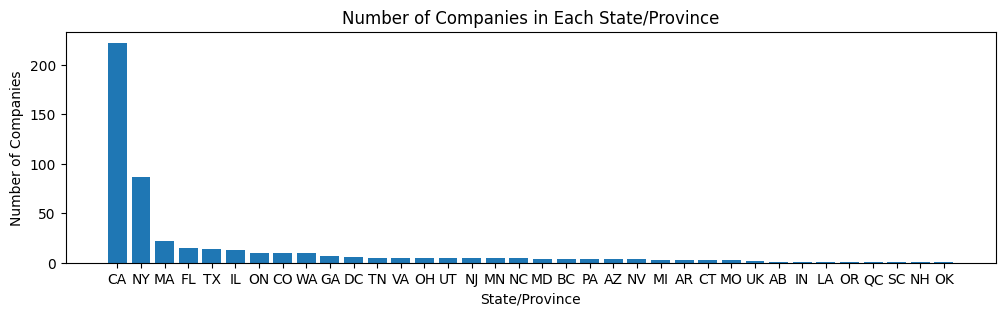

In [ ]:
#create lists containing state count info
states = state_dupe_drop_df['state'].value_counts().index
stateCounts = state_dupe_drop_df['state'].value_counts().values

#create and display bar chart
plt.figure(figsize = (12,3))
plt.bar(states, stateCounts)
plt.title('Number of Companies in Each State/Province')
plt.xlabel('State/Province')
plt.ylabel('Number of Companies')
plt.show()

####Using `seaborn`:

We can also use `seaborn` to make a similar count chart:

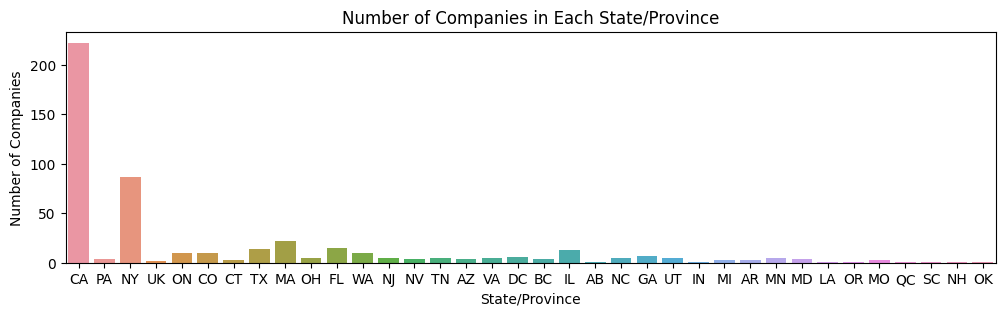

In [ ]:
plt.figure(figsize = (12,3))
sns.countplot(data = state_dupe_drop_df, x='state')
plt.title('Number of Companies in Each State/Province')
plt.xlabel('State/Province')
plt.ylabel('Number of Companies')
plt.show()

###Question 2

Which state are most of the companies from?

From our graphs in the previous section, we find that **the state with the most companies is California**.

###Question 3

Using matplotlib/seaborn, create a bar chart that shows a sum of how many total job openings there are in each industry.

####Checking and Cleaning the Data

Here, the code looks for duplicates in company name and industry.  Upon investigation, we find that we can keep the last duplicate of each version without losing data relevant to the question posed above. Note that records with different industries are not dropped since it is feasible that a company could have job openings in different industires.

In [ ]:
df[df.duplicated(subset = ['company_name', 'Industry'], keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
129,Optimism,Optimism.io,San Francisco,CA,United States,37,NaN,Tech Services,4408000.0,NaN,NaN,"Paradigm, Huobi Ventures, Andreessen Horowitz",NaN,NaN,1.650000e+09,178500000.0,1.31
146,Optimism,optimism.io,New York,NY,United States,54,2019.0,Tech Services,7190550.0,1.0,NaN,"Andreessen Horowitz, Paradigm",NaN,NaN,1.650000e+09,178500000.0,0.69
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


The code below temporarily drops the first verison of each of the aforementioned duplicates.

In [ ]:
industry_dupe_drop_df = df.drop_duplicates(subset = ['company_name', 'Industry'], keep = 'last')

####Using `matplotlib`:

The following code creates a subset of the data, aggregated on the sum of job openings in each industry. The code then creates a bar chart to visualize the data.

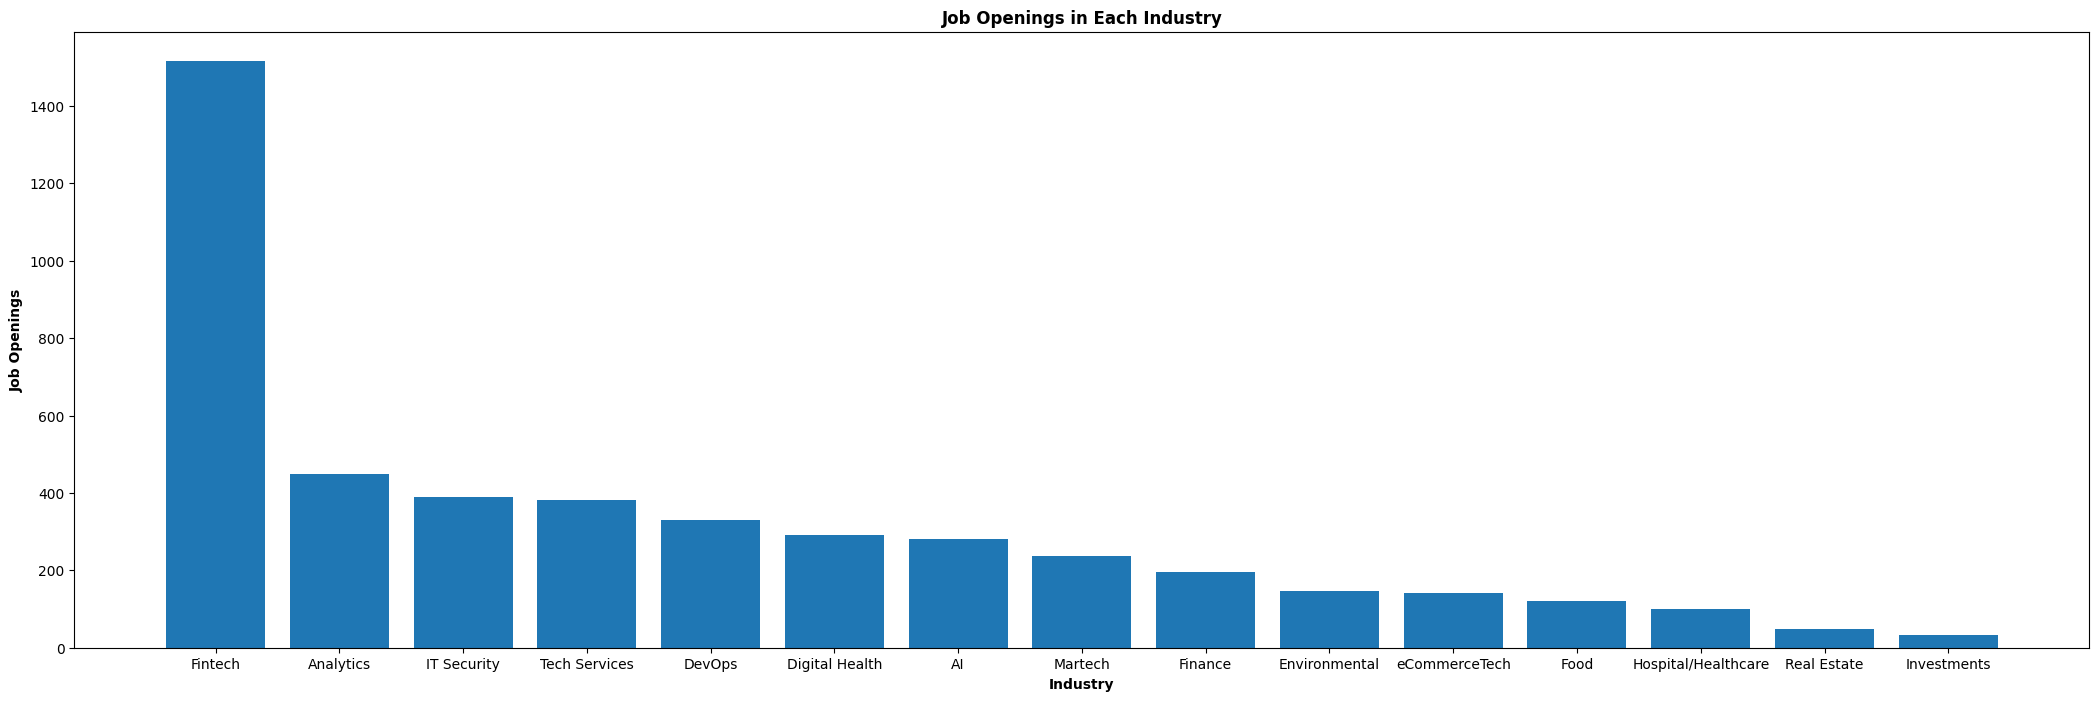

In [ ]:
#create subset grouped by industry and aggregated on the sum of job openings, sorted by job_opening sum
industry_job_df = industry_dupe_drop_df[['Industry', 'job_openings']].groupby('Industry', as_index = False).agg('sum').sort_values(by = 'job_openings', ascending = False)

#create and display bar chart for above
plt.figure(figsize = (26,8))
plt.bar(industry_job_df['Industry'], industry_job_df['job_openings'])
plt.title('Job Openings in Each Industry', fontweight = 'bold')
plt.ylabel('Job Openings', fontweight = 'bold')
plt.xlabel('Industry', fontweight = 'bold')
plt.show()

####Using `seaborn`:

Using `seaborn`, we can do something similar in fewer lines.

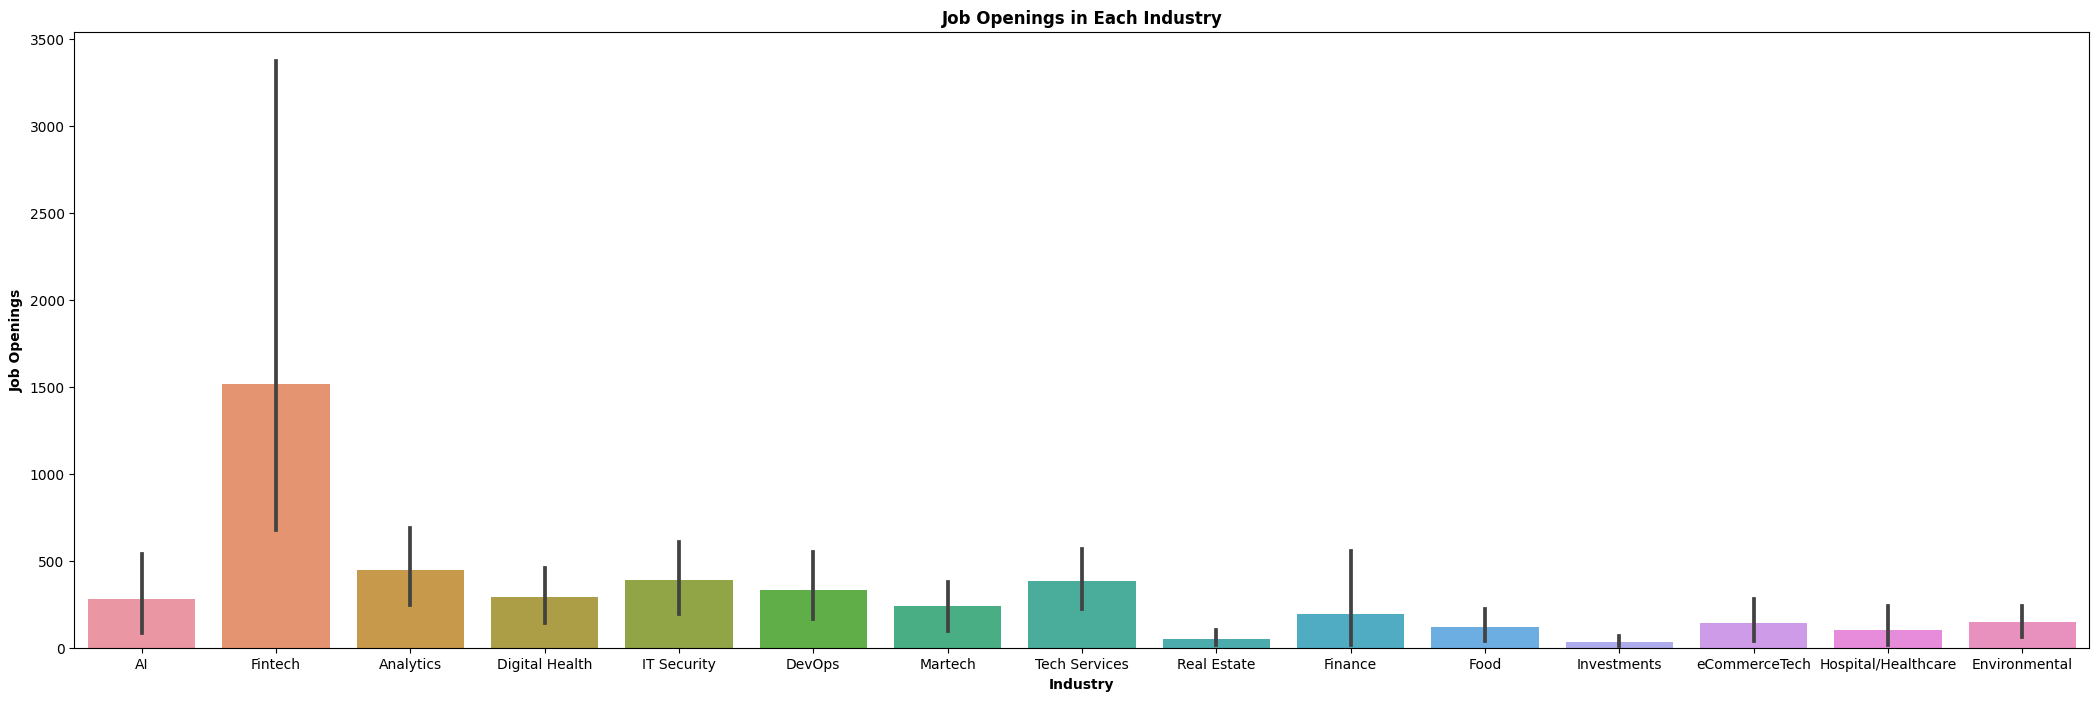

In [ ]:
#create and display bar chart for job openings in each industry
plt.figure(figsize = (26,8))
sns.barplot(data = industry_dupe_drop_df, x = 'Industry', y = 'job_openings', estimator = 'sum')
plt.title('Job Openings in Each Industry', fontweight = 'bold')
plt.ylabel('Job Openings', fontweight = 'bold')
plt.xlabel('Industry', fontweight = 'bold')
plt.show()

However, to produce a sorted visualization, we must use some of the lines from above (though we lose the error bars when we do so).

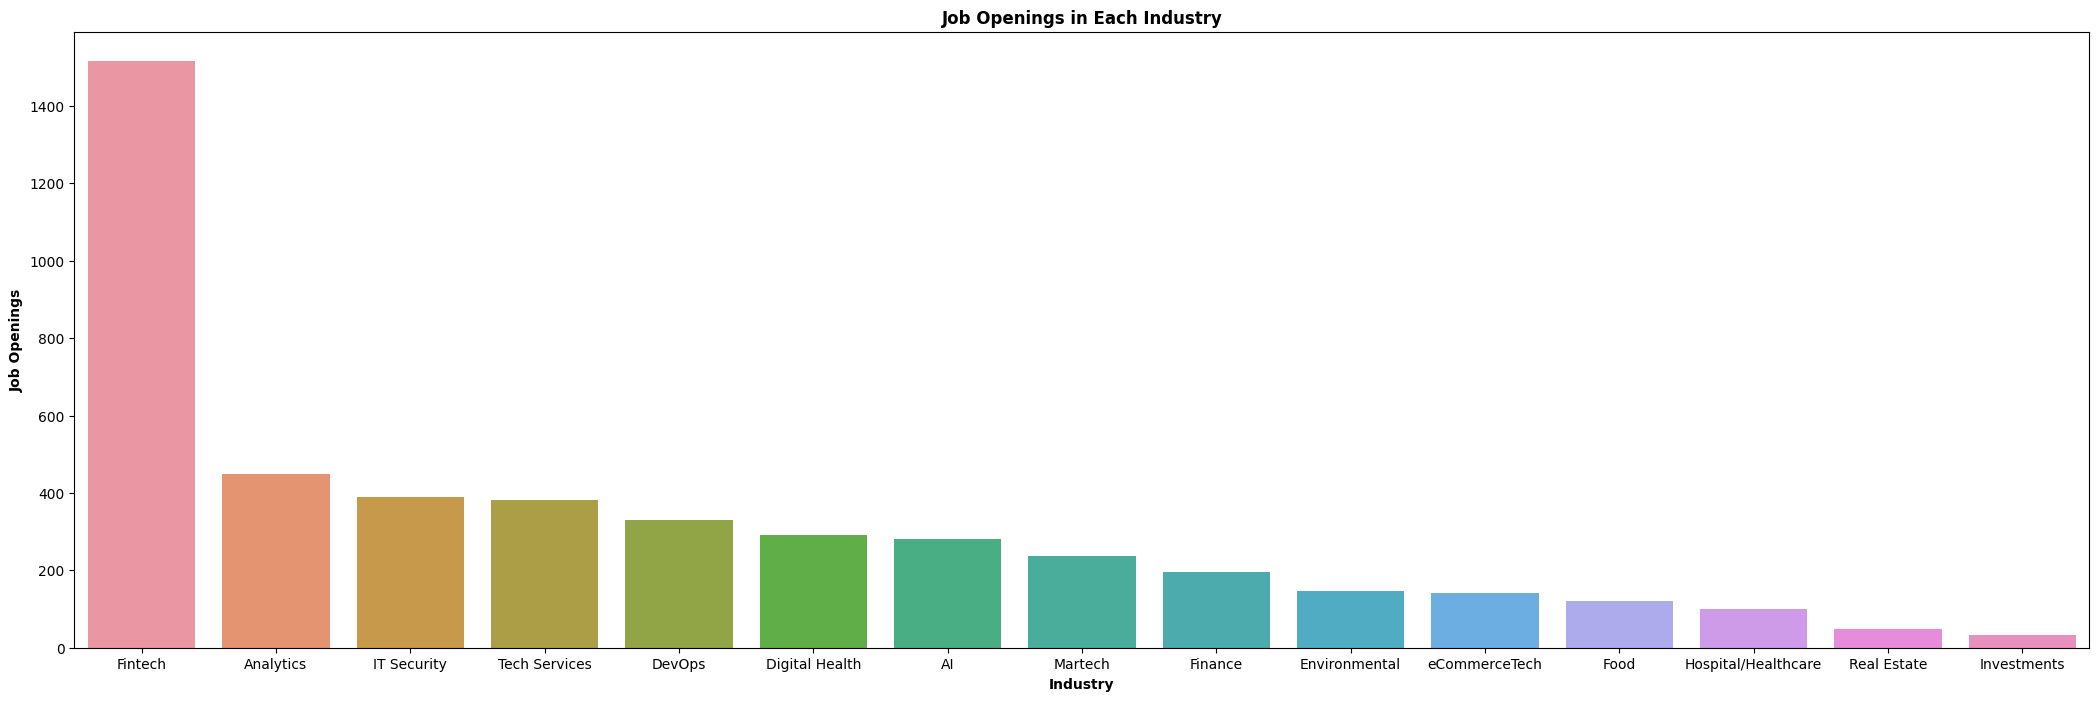

In [ ]:
#create and display bar chart for job openings in each industry
plt.figure(figsize = (26,8))
sns.barplot(data = industry_job_df, x = 'Industry', y = 'job_openings')
plt.title('Job Openings in Each Industry', fontweight = 'bold')
plt.ylabel('Job Openings', fontweight = 'bold')
plt.xlabel('Industry', fontweight = 'bold')
plt.show()

###Question 4

Which industry has the most job openings?

From our visualizations above, we see that **the "Fintech" industry has the most job openings**.

###Question 5

Using matplotlib/seaborn, create a line chart that shows the average growth rate for each founded year.

####Checking and Cleaning the Data

Before creating any visualizations, let's check for holes in our data set.  We saw in our review of the data in the overview that founded years have missing values. The code below shows that we have 99 entries with missing values in the founded column.

In [ ]:
df[df['founded'].isna()]

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,NaN,Fintech,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,564000000.0,1.34
4,Anthropic,anthropic.com,San Francisco,CA,USA,131,NaN,AI,15400000.0,1.0,NaN,NaN,NaN,NaN,4.400000e+09,1300000000.0,1.38
18,Monte Carlo,montecarlodata.com,San Francisco,CA,United States,294,NaN,Analytics,35668500.0,1.0,saas,IVP,NaN,NaN,1.600000e+09,101000000.0,0.95
30,Eldridge Industries,eldridge.com,Greenwich,CT,United States,103,NaN,Finance,22680000.0,1.0,NaN,NaN,NaN,NaN,3.000000e+09,1400000000.0,0.26
35,Vendr,vendr.com,Boston,MA,United States,452,NaN,Tech Services,87471250.0,1.0,NaN,"Craft Ventures, SoftBank Vision Fund 2",NaN,NaN,1.000000e+09,132000000.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,H1,h1insights.com,New York,NY,United States,483,NaN,Tech Services,93364050.0,1.0,NaN,NaN,NaN,NaN,NaN,170900000.0,0.07
471,Provide,getprovide.com,San Francisco,CA,United States,217,NaN,Finance,60060000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.09
474,Luxury Presence,luxurypresence.com,Santa Monica,CA,United States,552,NaN,Martech,103124000.0,1.0,"Real Estate, Advertising",NaN,NaN,NaN,NaN,31300000.0,0.74
489,Kintentâ„¢ï¸,kintent.com,Boston,MA,United States,74,NaN,Tech Services,11310000.0,1.0,NaN,NaN,NaN,NaN,NaN,17100000.0,1.47


Let's see if we can remove some duplicates to get a better picture of the number of missing entries. For the purposes of this visualization, companies with the same name, city, state, and industry will be considered the same company. Note that this analysis considers different industries within a company as separate as it is feasible that different departments were founded at different times.

First, we must ensure that there are no standardization errors in the city data.  The code below finds all unique entires in the city column and displays them in alphabetical order.  We can see at least two instances of a standardization error in the capitalizations of "SAN FRANCISCO" and "TEMPE".  We may also notice the two Chicago entries, one of which has a space at the end.

In [ ]:
print(df['city'].sort_values().unique())

['Alexandria' 'Arlington' 'Atlanta' 'Austin' 'Baltimore' 'Bellevue'
 'Berkeley' 'Beverly Hills' 'Bloomfield Hills' 'Boston' 'Brisbane'
 'Brookline' 'Brooklyn' 'Burlingame' 'Burlington' 'Burnaby' 'Calgary'
 'California ' 'Cambridge' 'Campbell' 'Carson City' 'Chandler'
 'Charleston' 'Charlotte' 'Chicago' 'Chicago ' 'Cincinnati' 'Cleveland'
 'Clinton Township ' 'Columbus' 'Coppell' 'Culver City' 'Dallas' 'Delanco'
 'Denver' 'Draper' 'Durham' 'El Segundo' 'Enid' 'Fairfield' 'Fayetteville'
 'Fort Lee' 'Freeport' 'Fremont' 'Golden' 'Greenwich' 'Greenwood Village'
 'Hanover' 'Hayward' 'Hoboken' 'Indianapolis' 'Irvine' 'Irving'
 'Jacksonville' 'Jefferson' 'Jersey City' 'Las Vegas' 'Lehi' 'London'
 'Los Altos' 'Los Altos Hills' 'Los Angeles' 'Louisville' 'Mansfield'
 'Marina Del Rey' 'Menlo Park' 'Miami' 'Mill Valley' 'Milton'
 'Minneapolis' 'Mississauga' 'Montreal' 'Monument' 'Morrisville'
 'Mountain View' 'Nashua' 'Nashville' 'Natick' 'New York' 'Newport Beach'
 'Newton' 'Oakdale' 'Oakland' '

The code below corrects the standardization errors and displays our fixed list of cities.

In [ ]:
df['city'] = df['city'].str.title()
df['city'] = df['city'].str.replace('\s$','')

df['city'].sort_values().unique()

<ipython-input-20-c6ad0df8c253>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('\s$','')


array(['Alexandria', 'Arlington', 'Atlanta', 'Austin', 'Baltimore',
       'Bellevue', 'Berkeley', 'Beverly Hills', 'Bloomfield Hills',
       'Boston', 'Brisbane', 'Brookline', 'Brooklyn', 'Burlingame',
       'Burlington', 'Burnaby', 'Calgary', 'California', 'Cambridge',
       'Campbell', 'Carson City', 'Chandler', 'Charleston', 'Charlotte',
       'Chicago', 'Cincinnati', 'Cleveland', 'Clinton Township',
       'Columbus', 'Coppell', 'Culver City', 'Dallas', 'Delanco',
       'Denver', 'Draper', 'Durham', 'El Segundo', 'Enid', 'Fairfield',
       'Fayetteville', 'Fort Lee', 'Freeport', 'Fremont', 'Golden',
       'Greenwich', 'Greenwood Village', 'Hanover', 'Hayward', 'Hoboken',
       'Indianapolis', 'Irvine', 'Irving', 'Jacksonville', 'Jefferson',
       'Jersey City', 'Las Vegas', 'Lehi', 'London', 'Los Altos',
       'Los Altos Hills', 'Los Angeles', 'Louisville', 'Mansfield',
       'Marina Del Rey', 'Menlo Park', 'Miami', 'Mill Valley', 'Milton',
       'Minneapolis', 'Missis

Our duplicate data can now be identified by company name, city, state, and industry as shown in the following code.  We may notice some differences in various columns, but looking at the columns our question concerns, the company Nature's Fynd has two different values for the growth_percentage. For this visualization, we will consider the growth_percentage to be the average of the duplicates and then drop the duplicates.

In [ ]:
df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'], keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


This code replaces the growth_percentage value in each duplicate with the average across its fellow duplicates.

In [ ]:
#create a list of duplicated companies
companies = df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'])]['company_name']

#create list of indeces for duplicates
indeces = df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'], keep = False)].index

#create copy of df
growth_founded_df = df.copy()

#update growth percentage in duplicates
for company in companies:
  #create filter for company matchs in the set of duplicates
  matchInDupesFilter = (df.index.isin(indeces)) & (df['company_name'] == company)

  #calculate mean growth percentage
  mean_growth = df.loc[matchInDupesFilter, 'growth_percentage'].mean()

  #update growth
  growth_founded_df.loc[matchInDupesFilter, 'growth_percentage'] = df.loc[matchInDupesFilter, 'growth_percentage'].mean()

Below, this code shows the same duplicates with the corrections in place.  Note the change in the Nature's Fynd growth percentage.

In [ ]:
growth_founded_df.loc[indeces].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.230
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.230
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.125
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.125
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.110
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.110


From above, we see that we can drop the last entry in these duplicates without loss of relevant data.  The following code, therefore, drops the last version of each of the duplicates above.

In [ ]:
growth_founded_df.drop_duplicates(subset = ['company_name', 'city', 'state', 'Industry'], inplace = True)

Now that we've dealt with the duplicates, we will drop the remaining entries with null values in the founded and growth percentage columns from our temporary copy of the data set. As these values that directly affect the answer to our question cannot be imputed, they must be dropped (at least for this section of the analysis). This is accomplished by the code, here.

In [ ]:
growth_founded_df.dropna(subset = (['founded']), inplace = True)

####Using `matplotlib`:

Using our cleaned data, we can now create a line chart using `matplotlib` as seen in the code below.

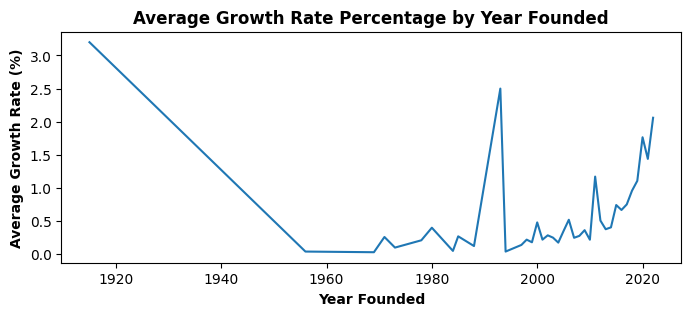

In [ ]:
#create subset of data containing the average growth percentage for each year
growFound_agg_df = growth_founded_df[['founded', 'growth_percentage']].groupby('founded', as_index = False).mean()

#create and display line plot
plt.figure(figsize = (8,3))
plt.plot(growFound_agg_df['founded'], growFound_agg_df['growth_percentage'])
plt.title('Average Growth Rate Percentage by Year Founded', fontweight = 'bold')
plt.xlabel('Year Founded', fontweight = 'bold')
plt.ylabel('Average Growth Rate (%)', fontweight = 'bold')
plt.show()

Note that the company founded in 1915 is a clear outlier (by year founded) in the data and may not be a good representation of more modern companies.

In [ ]:
df[df['founded'] == 1915]

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
443,St. Mary's Regional Medical Center,stmarysregional.com,Enid,OK,United States,231,1915.0,Hospital/Healthcare,88506000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.2


####Using `seaborn`:

We can produce much the same result with `seaborn` using this code:

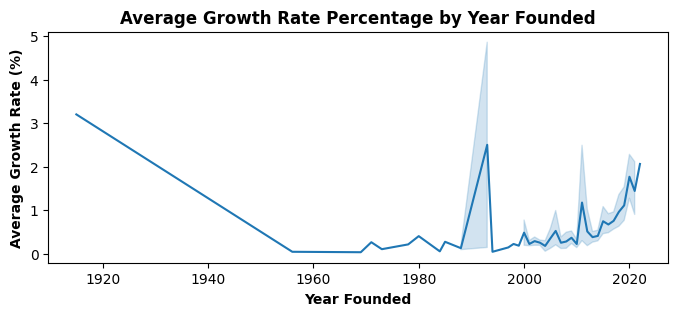

In [ ]:
#create subset of data containing the average growth percentage for each year
growFound_agg_df = growth_founded_df[['founded', 'growth_percentage']].groupby('founded', as_index = False).mean()

#
plt.figure(figsize = (8,3))
sns.lineplot(data = growth_founded_df, x = 'founded', y = 'growth_percentage')
plt.title('Average Growth Rate Percentage by Year Founded', fontweight = 'bold')
plt.xlabel('Year Founded', fontweight = 'bold')
plt.ylabel('Average Growth Rate (%)', fontweight = 'bold')
plt.show()

###Question 6

From the years 2000 to 2020, does the growth percentage seem to be increasing, decreasing, or not changing at all?

Our visualizations above clearly indicate that **the growth percentage between 2000 and 2020 is generally increasing**.

###Question 7

Using matplotlib/seaborn, create a scatter plot that compares the number of employees to estimated revenues for each company.

####Checking and Cleaning the Data

As discovered in previous sections, there are duplicate entries in the data set with different estimated revenues. These are shown below.


In [ ]:
df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'], keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


we can fix this in the same way as we did in the previous section:

In [ ]:
#create a list of duplicated companies
companies = df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'])]['company_name']

#create list of indeces for duplicates
indeces = df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'], keep = False)].index

#create copy of df
employees_revenues_df = df.copy()

#update estimated_revenues and employees
for company in companies:
  #create filter for company matchs in the set of duplicates
  matchInDupesFilter = (df.index.isin(indeces)) & (df['company_name'] == company)

  #calculate mean estimated_revenues and mean employees
  mean_revenues = df.loc[matchInDupesFilter, 'estimated_revenues'].mean()
  mean_employees = df.loc[matchInDupesFilter, 'employees'].mean()

  #update estimated_revenues and employees
  employees_revenues_df.loc[matchInDupesFilter, 'estimated_revenues'] = df.loc[matchInDupesFilter, 'estimated_revenues'].mean()
  employees_revenues_df.loc[matchInDupesFilter, 'employees'] = df.loc[matchInDupesFilter, 'employees'].mean()

The entries are shown here with the employees and estimated revenues columns (only) fixed with the average value across duplicates.

In [ ]:
employees_revenues_df.loc[indeces].sort_values('company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27515562.5,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27515562.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,154,2012.0,Food,47020500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,154,2012.0,Food,47020500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


We can now drop these duplicates with the following code:

In [ ]:
employees_revenues_df.drop_duplicates(subset = ['company_name', 'city', 'state', 'Industry'], inplace = True)

Now that the duplicates are out of the way, we can drop entries with null values in the columns, estimated revenues.  This is not imputable.  We have no need to drop entries with null employees values as there are none (see Overview).

The code below drops the appropriate enries.

In [ ]:
employees_revenues_df.dropna(subset = 'estimated_revenues', inplace = True)

####Using `matplotlib`:

We can now make our visualizations, similarly to the previous section:

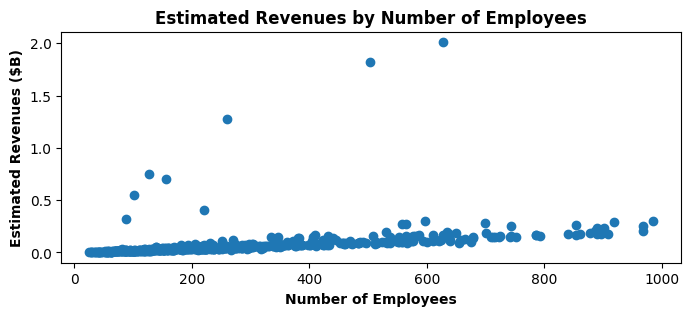

In [ ]:
#create shorthand for later use in scaling down revenues
billion = 1000000000

#create and display line plot
plt.figure(figsize = (8,3))
plt.scatter(employees_revenues_df['employees'], employees_revenues_df['estimated_revenues'] / billion) #scale revenues
plt.title('Estimated Revenues by Number of Employees', fontweight = 'bold')
plt.xlabel('Number of Employees', fontweight = 'bold')
plt.ylabel('Estimated Revenues ($B)', fontweight = 'bold') #scale revenues
plt.show()

We notice, in the above visualization, that there seem to be a number of outliers in the data set as it pertains to revenue.  The trend, however is not masked by these outliers, so they will remain in the data set.

####Using `seaborn`:

As before, the `seaborn` version:

<Figure size 800x300 with 0 Axes>

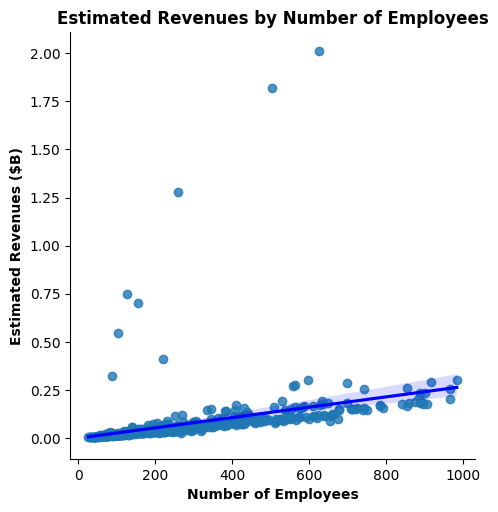

In [ ]:
#create new column in data set for scaled esimated_revenue
employees_revenues_df['estimated_revenues_scaled'] = employees_revenues_df['estimated_revenues'] / billion

#create and display line plot
plt.figure(figsize = (8,3))
sns.lmplot(data = employees_revenues_df, x = 'employees', y = 'estimated_revenues_scaled', line_kws = {'color': 'blue'})
plt.title('Estimated Revenues by Number of Employees', fontweight = 'bold')
plt.xlabel('Number of Employees', fontweight = 'bold')
plt.ylabel('Estimated Revenues ($B)', fontweight = 'bold') #scale revenues
plt.show()

This time, a trendline is also displayed. Again we see the outliers, but the trend line remains almost unaffected.

###Question 8

What is the relationship between number of employees and estimated revenues?

We find that, despite outliers, the relationship between estimated revenues and number of employees is a positive one.  That is, **the estimated revenues increase with the number of employees**.



###Question 9

Using matplotlib/seaborn, create a histogram that measures the number of companies founded in each year.

####Checking and Cleaning the Data

As above, so below. The data set contains duplicates and null values. The following code shows the duplicate entries. Again, for the purposes of this visualization, an entry is considered to be a duplicate based on 'company_name', 'city', 'state', and 'Industry'. Companies with the same name but different industries are considered different companies for these purposes.

In [ ]:
df[df.duplicated(subset = ['company_name', 'city', 'state', 'Industry'], keep = False)].sort_values(by = 'company_name')

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
435,Karbon,karbonhq.com,Sausalito,CA,United States,167,2014.0,Tech Services,27278125.0,1.0,saas,NaN,NaN,NaN,NaN,91800000.0,0.23
436,Karbon,karbonhq.com,Sausalito,CA,United States,167,NaN,Tech Services,27753000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.23
349,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,158,2012.0,Food,48181500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.16
362,Nature's Fynd,naturesfynd.com,Chicago,IL,United States,150,2012.0,Food,45859500.0,1.0,NaN,NaN,NaN,NaN,1.000000e+09,509600000.0,0.09
356,Palmetto,palmetto.com,Charleston,SC,United States,565,2010.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11
357,Palmetto,palmetto.com,Charleston,SC,United States,565,2009.0,Environmental,158153100.0,6.0,NaN,NaN,NaN,NaN,NaN,478300000.0,0.11


Since these are duplicates, they need to be dropped. This is easy for Nature's Fynd, but the other two duplicates are slightly more complicated. The second version of Karbon can be dropped as it has a null founded value. A quick google search* finds that Palmetto was founded in 2010.  We can then drop the second version of the Palmetto duplicate.

The following code drops the last version of each of the duplicates from the data set.

    *[https://www.google.com/search?q=when+was+Palmetto+founded&rlz=1C1UEAD_enUS1027US1027&oq=when+was+Palmetto+founded&aqs=chrome..69i57j0i22i30l2j0i390i650l2.15979j0j15&sourceid=chrome&ie=UTF-8](https://)

In [ ]:
company_founded_df = df.drop_duplicates(subset = ['company_name', 'city', 'state', 'Industry'], keep = 'first')

Now we address the null values in the founded column as shown here.

In [ ]:
company_founded_df[company_founded_df['founded'].isna()]

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,NaN,Fintech,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,564000000.0,1.34
4,Anthropic,anthropic.com,San Francisco,CA,USA,131,NaN,AI,15400000.0,1.0,NaN,NaN,NaN,NaN,4.400000e+09,1300000000.0,1.38
18,Monte Carlo,montecarlodata.com,San Francisco,CA,United States,294,NaN,Analytics,35668500.0,1.0,saas,IVP,NaN,NaN,1.600000e+09,101000000.0,0.95
30,Eldridge Industries,eldridge.com,Greenwich,CT,United States,103,NaN,Finance,22680000.0,1.0,NaN,NaN,NaN,NaN,3.000000e+09,1400000000.0,0.26
35,Vendr,vendr.com,Boston,MA,United States,452,NaN,Tech Services,87471250.0,1.0,NaN,"Craft Ventures, SoftBank Vision Fund 2",NaN,NaN,1.000000e+09,132000000.0,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,H1,h1insights.com,New York,NY,United States,483,NaN,Tech Services,93364050.0,1.0,NaN,NaN,NaN,NaN,NaN,170900000.0,0.07
471,Provide,getprovide.com,San Francisco,CA,United States,217,NaN,Finance,60060000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.09
474,Luxury Presence,luxurypresence.com,Santa Monica,CA,United States,552,NaN,Martech,103124000.0,1.0,"Real Estate, Advertising",NaN,NaN,NaN,NaN,31300000.0,0.74
489,Kintentâ„¢ï¸,kintent.com,Boston,MA,United States,74,NaN,Tech Services,11310000.0,1.0,NaN,NaN,NaN,NaN,NaN,17100000.0,1.47


We do so by dropping each one (since they are not imputable from the data provided and are too numerous to research and input by hand).  The code below accomplishes this.

In [ ]:
company_founded_df = company_founded_df.dropna(subset = 'founded')

####Using `matplotlib`:

Creating our visualization with `matplotlib` goes pretty much the same way as before, using a different plotting function for a different plot type and some new preparatory steps.

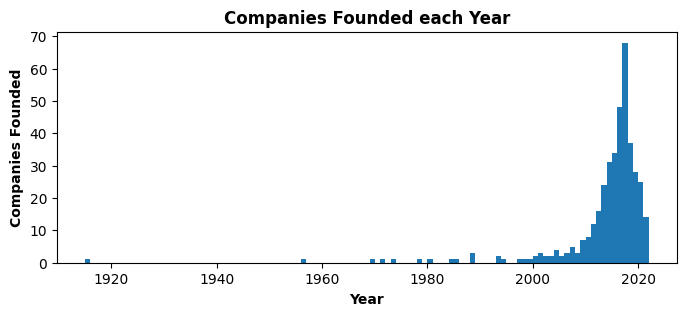

In [ ]:
yearMax = employees_revenues_df['founded'].max()
yearMin = employees_revenues_df['founded'].min()
yearRange = yearMax - yearMin

#create and display line plot
plt.figure(figsize = (8,3))
plt.hist(employees_revenues_df['founded'], bins = int(yearRange))
plt.title('Companies Founded each Year', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Companies Founded', fontweight = 'bold')
plt.show()

####Using `seaborn`:

One final time, we have the `seaborn` version shown here.

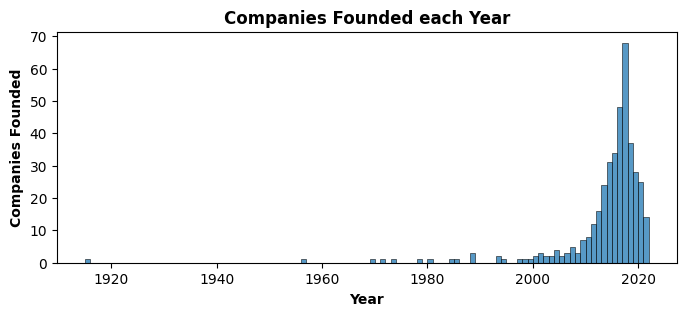

In [ ]:
#create and display line plot
plt.figure(figsize = (8,3))
sns.histplot(data = employees_revenues_df, x = 'founded', bins = int(yearRange))
plt.title('Companies Founded each Year', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Companies Founded', fontweight = 'bold')
plt.show()

###Question 10

Does the histogram that results from measuring the year each company was created create a graph that is right skewed, left skewed, or not skewed at all?

The histograms above show a tail to the left. We conclude, therefore, that **the number of companies founded each year is left-skewed**.

##Results

The visualizations created in this analysis speak for themselves. As for the answers to the associated questions, we find that the number of companies founded each year is *left-skewed*, the estimated revenues *increase* with the number of employees, the growth percentage between 2000 and 2020 is *generally increasing*, the *"Fintech"* industry has the most job openings, and the state with the most companies is *California*.